# Random Forest Classification

Random Forest Classification is based on Ensemble learning concepts or Random forest is a version of ensemble learning.Ensemble learning is when you take multiple algorithms on a data set or same algorithm multiple times and you put together to make something much better than original.Steps involved in Random Forest Classification:
1. Pick Random K data points from Trainingset
2. Build Decision Tree associated to these K data points.
3. Choose the number 'n' of trees you want to build and repeat steps 1 & 2
4. For a new data point, make each one of your Ntree trees predict the value of the label and maximum frequency of the all the predicted labels from n trees will be chosen as the prediction of the data point.

Problem with Random Forest Classification is 'Over fitting'. So we prefer Kernel SVM to Random Forest Classification. Over fitting happens because 'n' of decision trees will make accurate predictions for the training data set and for test set the regions might be empty which leads to incorrect predictions many times. In this note book random forest classification with 10 and 100 trees were demonstrated and problem of over fitting is clearly observed in test set results.


In [1]:
# Random Forest Classification
# Importing the libraries
import warnings
warnings.simplefilter("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#features of the data
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [6]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [7]:
y.shape

(400,)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [9]:
y_test.shape

(100,)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Fitting Random Forest Classification to the Training set with 10 decision trees
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=15, min_samples_split= 7,n_estimators= 200)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=7, n_estimators=200)

In [29]:
from sklearn.model_selection import GridSearchCV

params={'min_samples_split':[5, 2, 7, 3, 8],'n_estimators':[200, 100, 300, 400, 50],
'max_depth':[15,20, 10]}


gs = GridSearchCV(estimator=classifier, param_grid=params, cv=10)

# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train, y_train)


In [31]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 15, 'min_samples_split': 7, 'n_estimators': 200}
0.9033333333333335


In [40]:
classifier.feature_importances_

array([0.51734756, 0.48265244])

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
print(cm)

[[63  5]
 [ 5 27]]


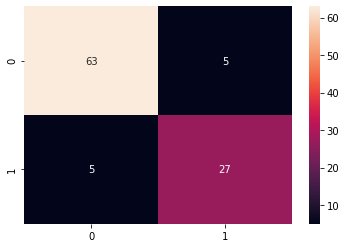

In [37]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [38]:
#lets make the confusion matrix for training set
#Observe that it predicts training set very accurately
cm_train=confusion_matrix(y_train,classifier.predict(X_train))
print(cm_train)

[[178  11]
 [  4 107]]


In [39]:
from sklearn.metrics import accuracy_score

print("Training accuracy :", accuracy_score(y_train,classifier.predict(X_train)))
print("Testing accuracy :", accuracy_score(y_test,classifier.predict(X_test)))

Training accuracy : 0.95
Testing accuracy : 0.9


In [ ]:
np.arange(0,10,0.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


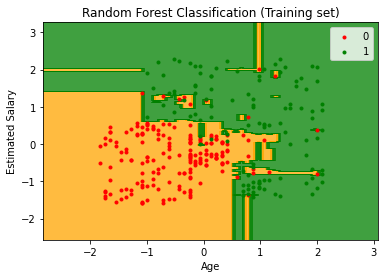

In [26]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


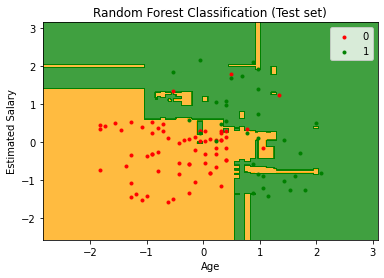

In [27]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Observe that in test set results, most of the orange region in the right side of the plot is empty because the training set overfitted and models thinks that those regions will contain red data points. Observe carefully that some of the green points fall at the edge of the orange boundary. This is due to overfitting. Lets build the random forest with 100 trees and check for overfitting.

In [ ]:
#random forest classification with 100 trees
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix for Test set predictions')
print(cm)
#lets make the confusion matrix for training set
#Observe that it predicts training set very accurately
cm_train=confusion_matrix(y_train,classifier.predict(X_train))
print('Confusion matrix for Training set predictions')
print(cm_train)

Observe that Confusion matrix shows no true negatives and false positives. So it means model learnt training data with 100% accuracy

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Distance mearsures = Similarity
# Cosine distance
# Adjusted cosine
# Pivot table

Linear, Logistic, Decision, Rf= supervised
SVM, KNN, Xgboost, Adaboost = Supervised